<a href="https://colab.research.google.com/github/justme088/lab-termodinamica/blob/main/Laboratorio1_Termodin%C3%A1mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laboratorio 1 de Termodinámica - TEMPERATURA Y USO DE TERMÓMETROS**
## Profesora: Mayubell Alvarado-Valdes
Grupo: Jostin Vargas, Alejandro Philips, Roxana Figueroa, Aidan García, Dionisio Conde, Keysi Bonilla

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **A.CALIBRACIÓN DE TERMÓMETROS DE MERCURIO Y TERMOPARES**

In [ ]:
df1 = pd.read_csv('Datos/parteA/parteA_hielo_mod.csv')
df2 = pd.read_csv('Datos/parteA/parteA_hielo_hot.csv')

In [ ]:
# Comparación de lecturas con la temperatura de referencia

# Sustancia: Agua fria
temperatura_referencia = 0 # ºC
df1_termometro = 9 # ºC
df1_c = df1.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
# ΔT = temperatura_medida - temperatura referencia
print("Sustancia: Agua fria\n")
print(pd.DataFrame({
    'Instrumento': ['Termocupla', 'Mini termocupla', 'Termómetro de mercurio'],
    'Temperatura (T-0)ºC': [df1_c['Temperatura1_gradosC_TERMOCUPLA'][0]-temperatura_referencia, df1_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0]-temperatura_referencia, df1_termometro-temperatura_referencia]
    }).to_string(index=False))


Sustancia: Agua fria

           Instrumento  Temperatura (T-0)ºC
            Termocupla                10.23
       Mini termocupla                10.56
Termómetro de mercurio                 9.00


In [ ]:
# Sustancia: Agua caliente
temperatura_referencia = 100 # ºC
df2_termometro = 14 # ºC
df2_c = df2.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
# ΔT = temperatura referencia - temperatura_medida
print("Sustancia: Agua caliente\n")
print(pd.DataFrame({
    'Instrumento': ['Termocupla', 'Mini termocupla', 'Termómetro de mercurio'],
    'Temperatura (100-T)ºC': [temperatura_referencia-df2_c['Temperatura1_gradosC_TERMOCUPLA'][0], temperatura_referencia-df2_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0], temperatura_referencia-df2_termometro]
    }).to_string(index=False))

Sustancia: Agua caliente

           Instrumento  Temperatura (100-T)ºC
            Termocupla                  18.80
       Mini termocupla                  29.63
Termómetro de mercurio                  86.00


In [ ]:
#Precisión y exactitud de cada termómetro

def precision_exactitud(datos, columna1, titulo, valor_real1,valor_real2):
  def medidas(datos, columna):
    datos_ = datos[columna]
    desviacion_std = datos_.std()
    media = datos_.mean()
    last_row = float(datos_.iloc[-1])
    return [desviacion_std, media, last_row]

  stdev = round(float(medidas(datos, columna1)[0]),2)
  media = round(float(medidas(datos, columna1)[1]),2)
  last_row = round(float(medidas(datos, columna1)[2]),2)
  print(titulo)
  print("Precisión: 100% - CV% = "+"(1 - ("+str(stdev)+"/"+str(media)+"))*100 = "+str(round(((1.00 - (stdev/media)) *100),2))+"%")
  print("Exactitud: 100% - E% = "+"(1 -(|"+str(last_row)+" - "+str(valor_real1)+"|/"+str(valor_real2)+"))*100 = "+str(round(((1.00 - (abs((last_row - valor_real1) / valor_real2)))*100),2))+"%")
  return [round(((1.00 - (stdev/media)) *100),2),round(((1.00 - (abs((last_row - valor_real1) / valor_real2)))*100),2)]


In [ ]:
#Sustancia: Agua fria
print("Sustancia: Agua fria\n")
dato_termometro = 9 #ºC
precision_exactitud(df1, "Temperatura1_gradosC_TERMOCUPLA","Termocupla 1",0, 273.15)
print()
precision_exactitud(df2, "Temperatura_2_gradosC_TERMOCUPLA_MINI","Mini Termocupla",0, 273.15)
print()
print("Termómetro de mercurio")
print("Precisión: Nula (solo se hizo una medición)")
print("Exactitud: 100% - E% = "+"(1 -(|"+str(dato_termometro)+" - 0|/273.15))*100 = "+str(round(((1.00 - (abs((dato_termometro - 0) / 273.15)))*100),2))+"%")


Sustancia: Agua fria

Termocupla 1
Precisión: 100% - CV% = (1 - (2.5/13.42))*100 = 81.37%
Exactitud: 100% - E% = (1 -(|10.23 - 0|/273.15))*100 = 96.25%

Mini Termocupla
Precisión: 100% - CV% = (1 - (8.29/57.83))*100 = 85.66%
Exactitud: 100% - E% = (1 -(|70.37 - 0|/273.15))*100 = 74.24%

Termómetro de mercurio
Precisión: Nula (solo se hizo una medición)
Exactitud: 100% - E% = (1 -(|9 - 0|/273.15))*100 = 96.71%


In [ ]:
#Sustancia: Agua caliente
print("Sustancia: Agua caliente\n")
dato_termometro = 86 #ºC
precision_exactitud(df2, "Temperatura1_gradosC_TERMOCUPLA","Termocupla 1", 100, 100)
print()
precision_exactitud(df2, "Temperatura_2_gradosC_TERMOCUPLA_MINI","Mini Termocupla", 100, 100)
print()
print("Termómetro de mercurio")
print("Precisión: Nula (solo se hizo una medición)")
print("Exactitud: 100% - E% = "+"(1 -(|"+str(dato_termometro)+" - 100|/100))*100 = "+str(round(((1.00 - (abs((dato_termometro - 100) / 100)))*100),2))+"%")


Sustancia: Agua caliente

Termocupla 1
Precisión: 100% - CV% = (1 - (6.9/72.32))*100 = 90.46%
Exactitud: 100% - E% = (1 -(|81.2 - 100|/100))*100 = 81.2%

Mini Termocupla
Precisión: 100% - CV% = (1 - (8.29/57.83))*100 = 85.66%
Exactitud: 100% - E% = (1 -(|70.37 - 100|/100))*100 = 70.37%

Termómetro de mercurio
Precisión: Nula (solo se hizo una medición)
Exactitud: 100% - E% = (1 -(|86 - 100|/100))*100 = 86.0%


# **B.EQUILIBRIO TÉRMICO**

In [ ]:
df3 = pd.read_csv('Datos/parteB/parteB_agua_fria.csv')
df4 = pd.read_csv('Datos/parteB/parteB_agua_fria_con_caliente.csv')

In [ ]:
# Temperaturas registradas
df3_c = df3.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
df4_c = df4.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
df3_termometro = 24.5 #ºC
df4_termometro = 42 #ºC
print("Temperaturas registradas\n")
print(pd.DataFrame({
    'Instrumento': ['Termocupla', 'Mini termocupla', 'Termómetro de mercurio'],
    'Temperatura de agua fria': [df3_c['Temperatura1_gradosC_TERMOCUPLA'][0], df3_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0], df3_termometro],
    'Temperatura de agua agua fria con caliente': [df4_c['Temperatura1_gradosC_TERMOCUPLA'][0], df4_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0], df4_termometro],
    }).to_string(index=False))

Temperaturas registradas

           Instrumento  Temperatura de agua fria  Temperatura de agua agua fria con caliente
            Termocupla                     24.30                                       42.74
       Mini termocupla                     24.42                                       42.08
Termómetro de mercurio                     24.50                                       42.00


In [ ]:
# Como no fue medida la temperatura de agua caliente por sí sola, se puede realizar un estimado
# En la parte A se realizó la medición de exactitud y precisión de los diferentes instrumentos en agua caliente:
#Sustancia: Agua caliente
print("Sustancia: Agua caliente\n")
dato_termometro = 86 #ºC
precision_termocupla1 = precision_exactitud(df2, "Temperatura1_gradosC_TERMOCUPLA","Termocupla 1", 100, 100)[0]
print()
precision_termocuplaMini = precision_exactitud(df2, "Temperatura_2_gradosC_TERMOCUPLA_MINI","Mini Termocupla", 100, 100)[0]
print()
print("Termómetro de mercurio")
print("Precisión: Nula (solo se hizo una medición)")
print("Exactitud: 100% - E% = "+"(1 -(|"+str(dato_termometro)+" - 100|/100))*100 = "+str(round(((1.00 - (abs((dato_termometro - 100) / 100)))*100),2))+"%")
precision_termometro = round(((1.00 - (abs((dato_termometro - 100) / 100)))*100),2)

Sustancia: Agua caliente

Termocupla 1
Precisión: 100% - CV% = (1 - (6.9/72.32))*100 = 90.46%
Exactitud: 100% - E% = (1 -(|81.2 - 100|/100))*100 = 81.2%

Mini Termocupla
Precisión: 100% - CV% = (1 - (8.29/57.83))*100 = 85.66%
Exactitud: 100% - E% = (1 -(|70.37 - 100|/100))*100 = 70.37%

Termómetro de mercurio
Precisión: Nula (solo se hizo una medición)
Exactitud: 100% - E% = (1 -(|86 - 100|/100))*100 = 86.0%


In [ ]:
# Conociendo esos datos, se sabe la precisión de cada instrumento, se divide por 100
precision_termocupla1 = round((precision_termocupla1)/100,4)
precision_termocuplaMini = round((precision_termocuplaMini)/100,4)
precision_termometro = round((precision_termometro)/100,4)
print("Precisión de Termocupla 1: "+str(precision_termocupla1))
print("Precisión de Termocupla Mini: "+str(precision_termocuplaMini))
print("Precisión de Termómetro de mercurio: Nula (solo se hizo una sola medición)")

Precisión de Termocupla 1: 0.9046
Precisión de Termocupla Mini: 0.8566
Precisión de Termómetro de mercurio: Nula (solo se hizo una sola medición)


Despejando la siguiente ecuación se llega a la expresión que nos permite obtener el valor de temperatura de agua caliente
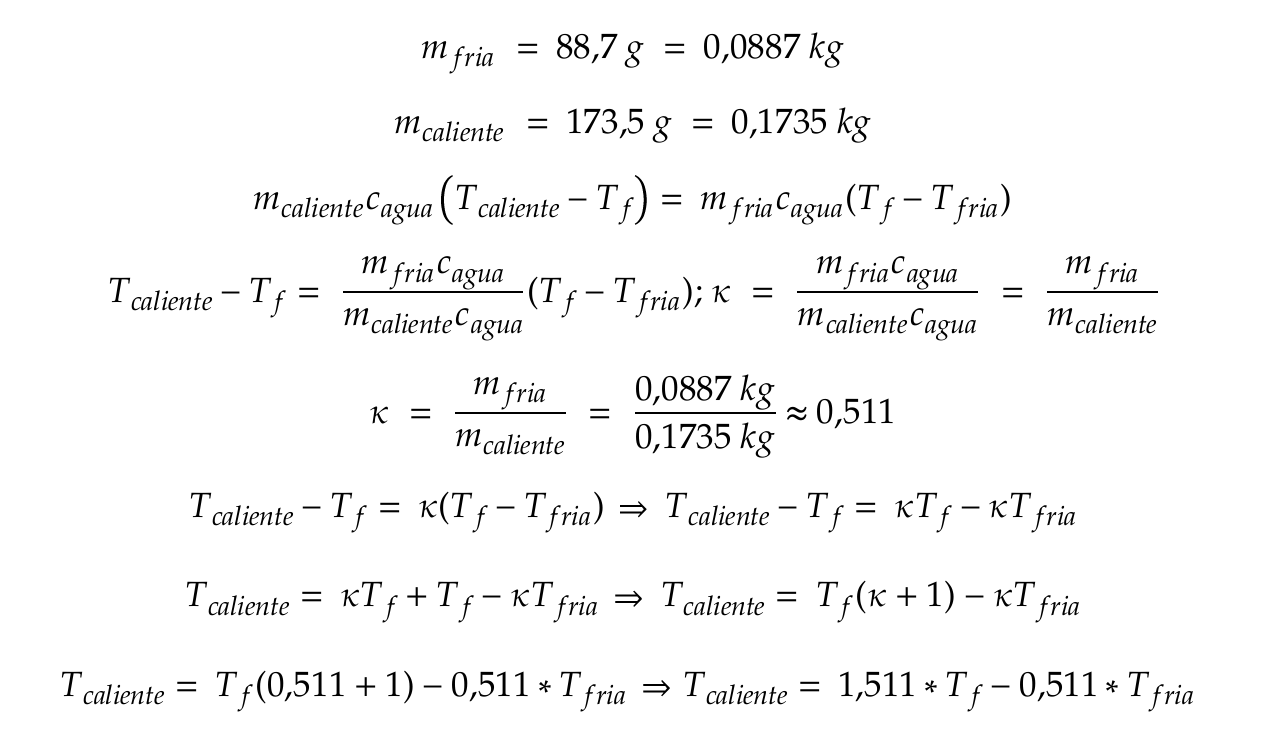

In [ ]:
# Ecuacion encontrada
def estimacion_temp(T_final,T_fria):
  return (1.511*T_final)-(0.511*T_fria)

In [ ]:
# Y cada valor obtenido de la ecuación, se multiplica por la precisión de cada instrumento, en el termómetro de mercurio se multiplicará por la media de la precisión de los otros dos
print("Temperaturas de agua caliente estimadas (ºC)\n")
# Para Termocupla 1
estimacion_termocupla1 = round((estimacion_temp(df4_c['Temperatura1_gradosC_TERMOCUPLA'][0],df3_c['Temperatura1_gradosC_TERMOCUPLA'][0])*precision_termocupla1),2)
print("Termocupla 1: "+str(estimacion_termocupla1))

# Para Termocupla Mini
estimacion_termocuplaMini = round((estimacion_temp(df4_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0],df3_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0])*precision_termocuplaMini),2)
print("Termocupla Mini: "+str(estimacion_termocuplaMini))

# Para Termómetro de mercurio
# Es cierto que se desconoce la precisión del termómetro de mercurio pero solo es un estimado
estimacion_termometro = round((estimacion_temp(df4_termometro,df3_termometro)*((precision_termocupla1+precision_termocuplaMini)/2)),2)
print("Termómetro de mercurio: "+str(estimacion_termometro))

Temperaturas de agua caliente estimadas (ºC)

Termocupla 1: 47.19
Termocupla Mini: 43.78
Termómetro de mercurio: 44.86


Despejando nuevamente la ecuación anterior para calcular el valor teórico de la temperatura final:
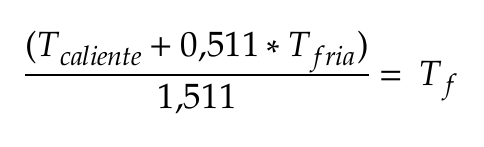

In [ ]:
# Ecuacion encontrada de la temperatura final teórica
def temp_final_teorica(T_caliente,T_fria):
  return (T_caliente+(0.511*T_fria))/1.511

In [ ]:
# Se cálcula ahora la temperatura final teórica usando nuestras estimaciones
print("Temperatura final teórica estimadas (ºC)\n")
# Para Termocupla 1
temp_final_teorica_termocupla1 = round(temp_final_teorica(estimacion_termocupla1, df3_c['Temperatura1_gradosC_TERMOCUPLA'][0]),2)
print("Termocupla 1: "+str(temp_final_teorica_termocupla1))

# Para Termocupla Mini
temp_final_teorica_termocuplaMini = round(temp_final_teorica(estimacion_termocuplaMini, df3_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0]),2)
print("Termocupla Mini: "+str(temp_final_teorica_termocuplaMini))

# Para Termómetro de mercurio
temp_final_teorica_termometro = round(temp_final_teorica(estimacion_termometro, df3_termometro),2)
print("Termómetro de mercurio: "+str(temp_final_teorica_termometro))

Temperatura final teórica estimadas (ºC)

Termocupla 1: 39.45
Termocupla Mini: 37.23
Termómetro de mercurio: 37.97


In [ ]:
# Con estos datos ahora se puede hacer esto:

print("Temperaturas registradas (ºC)\n")
print(pd.DataFrame({
    'Instrumento': ['Termocupla', 'Mini termocupla', 'Termómetro de mercurio'],
    'Temperatura de agua fria': [df3_c['Temperatura1_gradosC_TERMOCUPLA'][0], df3_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0], df3_termometro],
    'Temperatura de agua caliente (estimado)': [estimacion_termocupla1, estimacion_termocuplaMini, estimacion_termometro],
    'Temperatura de agua fria con caliente': [df4_c['Temperatura1_gradosC_TERMOCUPLA'][0], df4_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0], df4_termometro],
    }).to_string(index=False))

Temperaturas registradas (ºC)

           Instrumento  Temperatura de agua fria  Temperatura de agua caliente (estimado)  Temperatura de agua fria con caliente
            Termocupla                     24.30                                    47.19                                  42.74
       Mini termocupla                     24.42                                    43.78                                  42.08
Termómetro de mercurio                     24.50                                    44.86                                  42.00


In [ ]:
# Comparando ahora el valor teórico obtenido a partir del estimado de temperatura de agua caliente y el valor medido de la temperatura de agua fria con caliente:
print("Temperaturas registradas (ºC)\n")
print(pd.DataFrame({
    'Instrumento': ['Termocupla', 'Mini termocupla', 'Termómetro de mercurio'],
    'Temperatura de agua fria con caliente (medida)': [df4_c['Temperatura1_gradosC_TERMOCUPLA'][0], df4_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0], df4_termometro],
    'Temperatura de agua fria con caliente (teórica)': [temp_final_teorica_termocupla1, temp_final_teorica_termocuplaMini, temp_final_teorica_termometro],
    'Diferencia entre los valores': [df4_c['Temperatura1_gradosC_TERMOCUPLA'][0]-temp_final_teorica_termocupla1, df4_c['Temperatura_2_gradosC_TERMOCUPLA_MINI'][0]-temp_final_teorica_termocuplaMini, df4_termometro-temp_final_teorica_termometro],
    }).to_string(index=False))

Temperaturas registradas (ºC)

           Instrumento  Temperatura de agua fria con caliente (medida)  Temperatura de agua fria con caliente (teórica)  Diferencia entre los valores
            Termocupla                                           42.74                                            39.45                          3.29
       Mini termocupla                                           42.08                                            37.23                          4.85
Termómetro de mercurio                                           42.00                                            37.97                          4.03


# **C. REACCIONES QUÍMICAS Y LA TEMPERATURA**

In [ ]:
df5 = pd.read_csv('Datos/parteC/parteC_agua.csv')
df6 = pd.read_csv('Datos/parteC/parteC_alcohol.csv')
df7 = pd.read_csv('Datos/parteC/parteC_alcohol_agua.csv')
df8 = pd.read_csv('Datos/parteC/parteC_limon.csv')
df9 = pd.read_csv('Datos/parteC/parteC_limon_bicarbonato.csv')

In [ ]:
df5_c = df5.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
df6_c = df6.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
df7_c = df7.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
df8_c = df8.iloc[-1].rename('0').rename_axis('').to_frame().transpose()
df9_c = df9.iloc[-1].rename('0').rename_axis('').to_frame().transpose()

In [ ]:
# Tabla 1. Clasificación de Tipo de Reacción Mediante sus Propiedades Físicas.
print("Tabla 1")
print("Sustancia: limón con bicarbonato de sodio | Tipo de reacción: exotérmica\n")
print("Tiempo (s): 63.35")
lb_termocupla1_i = df9["Temperatura1_gradosC_TERMOCUPLA"][0]
lb_termocuplaMini_i = df9["Temperatura_2_gradosC_TERMOCUPLA_MINI"][0]
lb_termocupla1_f = df9_c["Temperatura1_gradosC_TERMOCUPLA"][0]
lb_termocuplaMini_f = df9_c["Temperatura_2_gradosC_TERMOCUPLA_MINI"][0]

print(pd.DataFrame({
    'Instrumento': ['Termocupla 1', 'Mini termocupla'],
    'Temperatura Inicial (ºC)': [lb_termocupla1_i, lb_termocuplaMini_i],
    'Temperatura Final (ºC)': [lb_termocupla1_f,lb_termocuplaMini_f],
    'Temperatura Inicial (ºF)': [round(((lb_termocupla1_i*(9/5))+32),2),round(((lb_termocuplaMini_i*(9/5))+32),2)],
    'Temperatura Final (ºF)': [round(((lb_termocupla1_f*(9/5))+32),2),round(((lb_termocuplaMini_f*(9/5))+32),2)],
    'Temperatura Inicial (K)': [lb_termocupla1_i+273.15, lb_termocuplaMini_i+273.15],
    'Temperatura Final (K)': [lb_termocupla1_f+273.15,lb_termocuplaMini_f+273.15],

    }).to_string(index=False))

Tabla 1
Sustancia: limón con bicarbonato de sodio | Tipo de reacción: exotérmica

Tiempo (s): 63.35
    Instrumento  Temperatura Inicial (ºC)  Temperatura Final (ºC)  Temperatura Inicial (ºF)  Temperatura Final (ºF)  Temperatura Inicial (K)  Temperatura Final (K)
   Termocupla 1                     22.64                   23.62                     72.75                   74.52                   295.79                 296.77
Mini termocupla                     22.46                   22.62                     72.43                   72.72                   295.61                 295.77


In [ ]:
# Tabla 2. Clasificación de Tipo de Reacción Mediante sus Propiedades Físicas.
print("Tabla 2")
print("Sustancia: agua con alcohol | Tipo de reacción: exotérmica\n")
print("Tiempo (s): 25.35")
aa_termocupla1_i = df7["Temperatura1_gradosC_TERMOCUPLA"][0]
aa_termocuplaMini_i = df7["Temperatura_2_gradosC_TERMOCUPLA_MINI"][0]
aa_termocupla1_f = df7_c["Temperatura1_gradosC_TERMOCUPLA"][0]
aa_termocuplaMini_f = df7_c["Temperatura_2_gradosC_TERMOCUPLA_MINI"][0]

print(pd.DataFrame({
    'Instrumento': ['Termocupla 1', 'Mini termocupla'],
    'Temperatura Inicial (ºC)': [aa_termocupla1_i, aa_termocuplaMini_i],
    'Temperatura Final (ºC)': [aa_termocupla1_f,aa_termocuplaMini_f],
    'Temperatura Inicial (ºF)': [round(((aa_termocupla1_i*(9/5))+32),2),round(((aa_termocuplaMini_i*(9/5))+32),2)],
    'Temperatura Final (ºF)': [round(((aa_termocupla1_f*(9/5))+32),2),round(((aa_termocuplaMini_f*(9/5))+32),2)],
    'Temperatura Inicial (K)': [aa_termocupla1_i+273.15, aa_termocuplaMini_i+273.15],
    'Temperatura Final (K)': [aa_termocupla1_f+273.15,aa_termocuplaMini_f+273.15],

    }).to_string(index=False))

Tabla 2
Sustancia: agua con alcohol | Tipo de reacción: exotérmica

Tiempo (s): 25.35
    Instrumento  Temperatura Inicial (ºC)  Temperatura Final (ºC)  Temperatura Inicial (ºF)  Temperatura Final (ºF)  Temperatura Inicial (K)  Temperatura Final (K)
   Termocupla 1                     28.85                   30.18                     83.93                   86.32                   302.00                 303.33
Mini termocupla                     30.22                   30.33                     86.40                   86.59                   303.37                 303.48


In [ ]:
# Comparación de los resultados

In [ ]:
print("Sustancia: agua con alcohol")
print(pd.DataFrame({
    'Instrumento': ['Termocupla 1', 'Mini termocupla'],
    'Diferencia de Temperatura (ºC)': [aa_termocupla1_f-aa_termocupla1_i,aa_termocuplaMini_f-aa_termocuplaMini_i],
    }).to_string(index=False))
aa_media = round((((aa_termocupla1_f-aa_termocupla1_i)+(aa_termocuplaMini_f-aa_termocuplaMini_i))/2),2)
print("\nMedia entre mediciones "+str(aa_media))

Sustancia: agua con alcohol
    Instrumento  Diferencia de Temperatura (ºC)
   Termocupla 1                            1.33
Mini termocupla                            0.11

Media entre mediciones 0.72


In [ ]:
print("Sustancia: limón con bicarbonato de sodio")
print(pd.DataFrame({
    'Instrumento': ['Termocupla 1', 'Mini termocupla'],
    'Diferencia de Temperatura (ºC)': [lb_termocupla1_f-lb_termocupla1_i,lb_termocuplaMini_f-lb_termocuplaMini_i],
    }).to_string(index=False))
lb_media = round((((lb_termocupla1_f-lb_termocupla1_i)+(lb_termocuplaMini_f-lb_termocuplaMini_i))/2),2)
print("\nMedia entre mediciones "+str(lb_media))

Sustancia: limón con bicarbonato de sodio
    Instrumento  Diferencia de Temperatura (ºC)
   Termocupla 1                            0.98
Mini termocupla                            0.16

Media entre mediciones 0.57


In [ ]:
print("Cambio de temperatura de las mezclas\n")
print(pd.DataFrame({
    'Sustancia': ['Agua con alcohol', 'Limón con bicarbonato de sodio'],
    'Cambio de temperatura': ['Mayor' if aa_media > lb_media else 'Menor', 'Mayor' if lb_media > aa_media else 'Menor'],
    }).to_string(index=False))

Cambio de temperatura de las mezclas

                     Sustancia Cambio de temperatura
              Agua con alcohol                 Mayor
Limón con bicarbonato de sodio                 Menor


In [ ]:
# Obtener la capacidad calorífica y el calor de cada mezcla

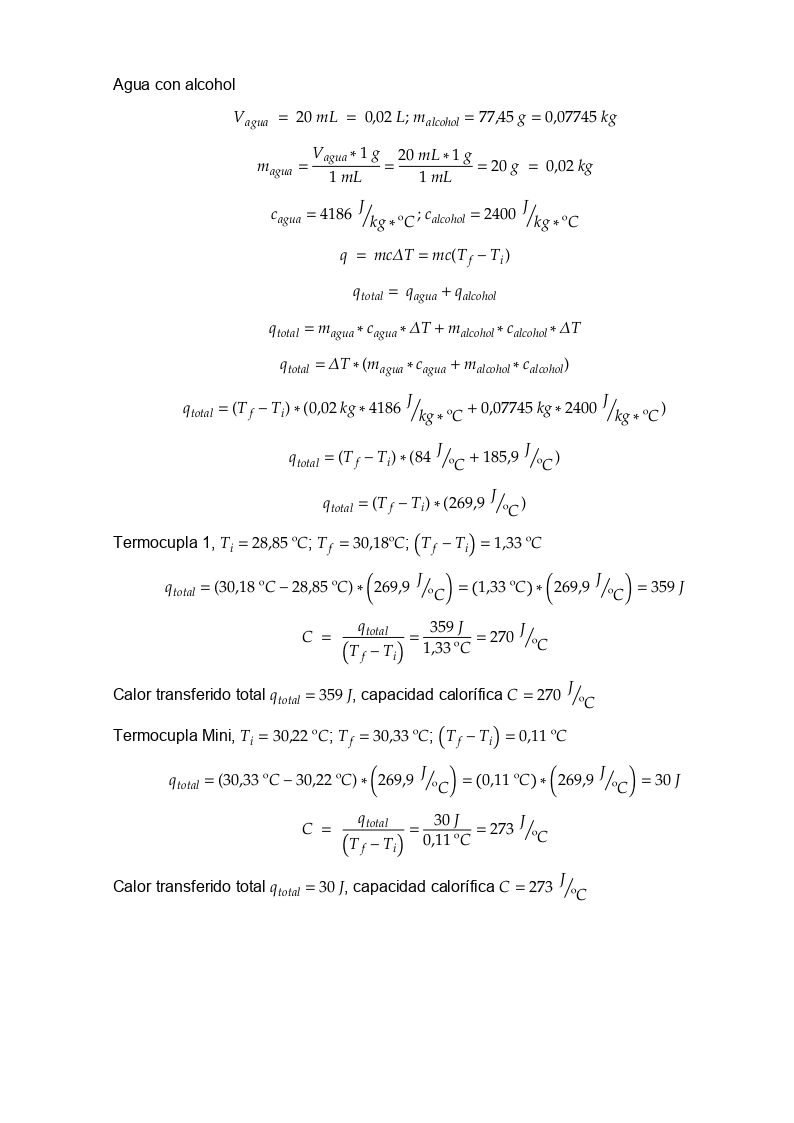

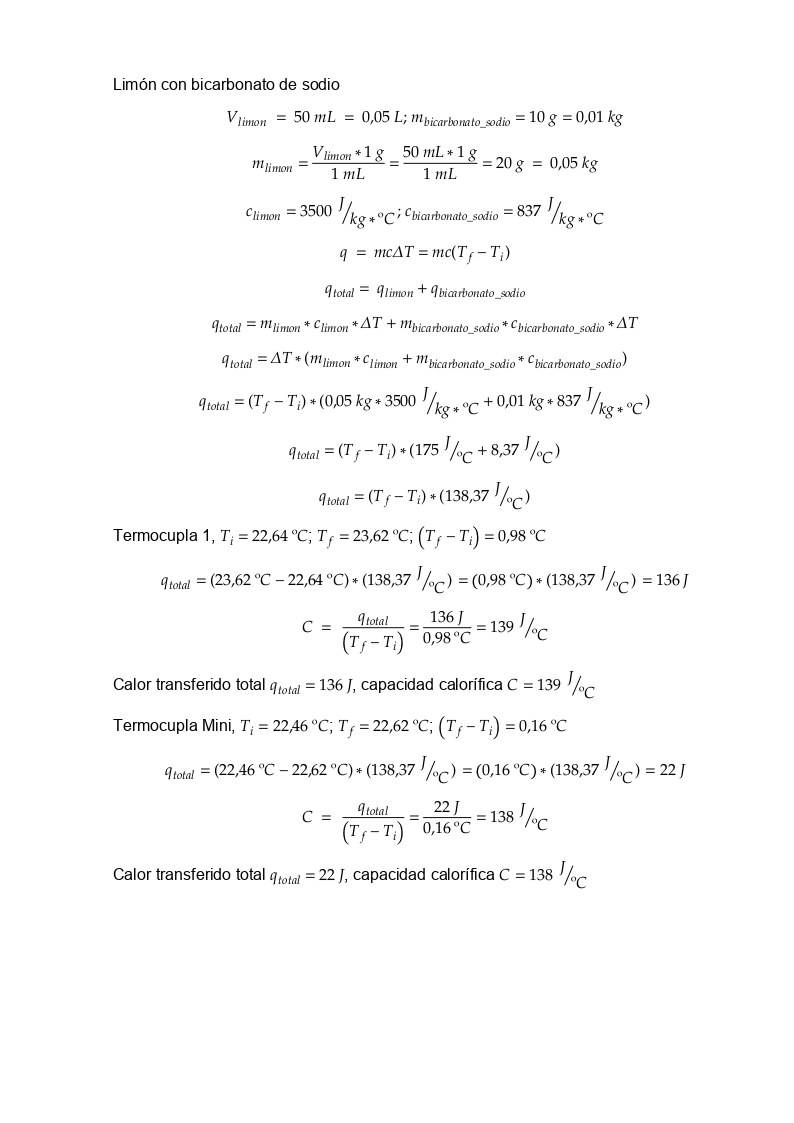

# **D. CURVA DE CALENTAMIENTO**

In [ ]:
import numpy as np
df10 = pd.read_csv('Datos/parteD/parteD_lab1_AGUAoriginal.csv')
df11 = pd.read_csv('Datos/parteD/parteD_lab1_AGUAprocesado.csv')
df12 = pd.read_csv('Datos/parteD/parteD_lab1_alcohol.csv')

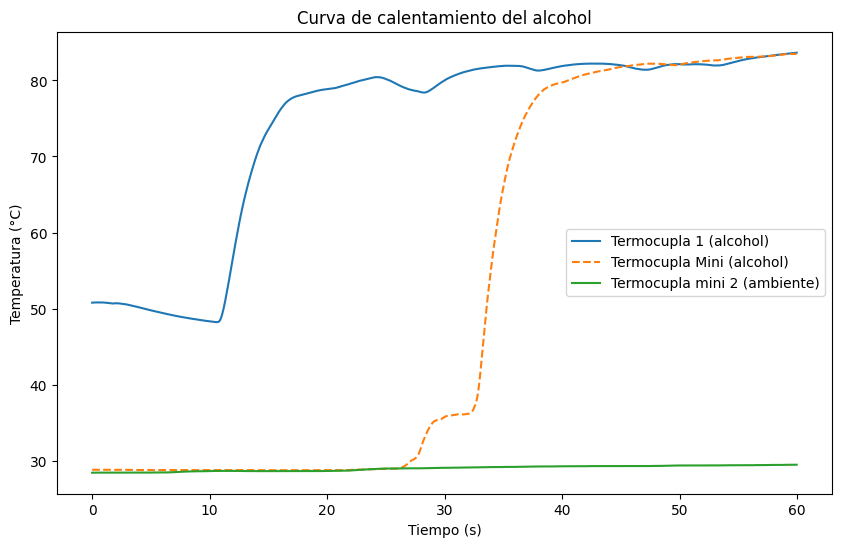

In [ ]:
# Curva de calentamiento del alcohol

df12.head()

plt.figure(figsize=(10, 6))
plt.plot(df12['Tiempo_s'], df12['Temperatura1_gradosC_TERMOCUPLA'], label='Termocupla 1 (alcohol)')
plt.plot(df12['Tiempo_s'], df12['Temperatura_3_gradosC_TERMOCUPLA_MINI_2'], label='Termocupla Mini (alcohol)', linestyle='dashed')
plt.plot(df12['Tiempo_s'], df12['Temperatura_2_gradosC_TERMOCUPLA_MINI_AMB'], label='Termocupla mini 2 (ambiente)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Curva de calentamiento del alcohol')
plt.legend()
plt.show()

Punto de mayor tasa de crecimiento (Termocupla 1): (t = 11.8 s, T = 83.64 ºC) con pendiente 9.1
Punto de mayor tasa de crecimiento (Termocupla Mini): (t = 33.3 s, T = 83.49 ºC) con pendiente 16.9
Punto de mayor tasa de crecimiento (Termocupla Mini 2): (t = 7.55 s, T = 29.47 ºC) con pendiente 0.2



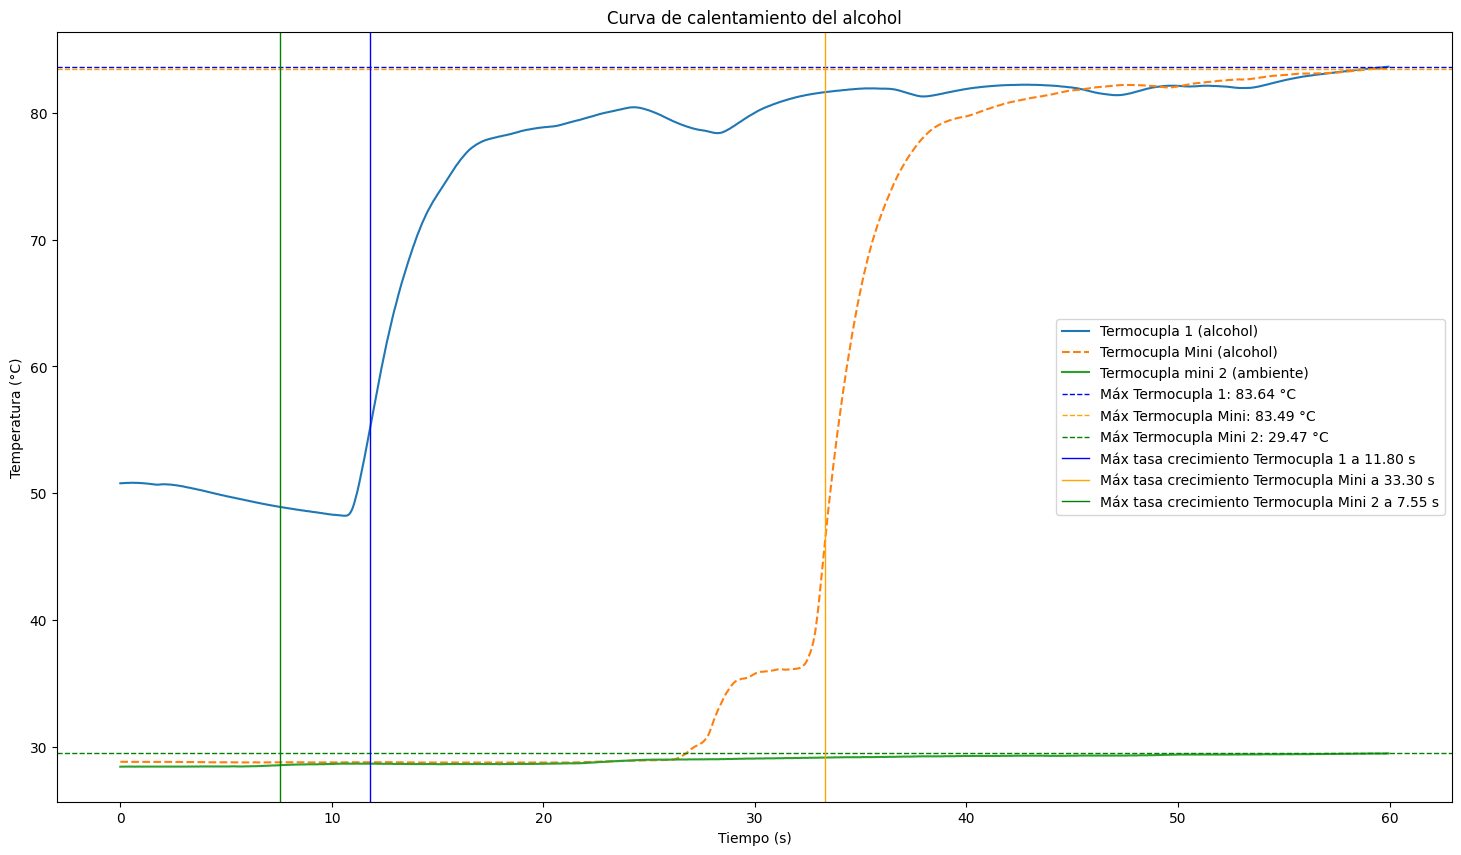

In [ ]:
# Valor máximo y mayor punto de tasa de cambio en cada gráfica para la curva de calentamiento del alcohol

# Calcular la derivada numérica (diferencia finita) de las temperaturas respecto al tiempo
df12['dT1_dt'] = np.gradient(df12['Temperatura1_gradosC_TERMOCUPLA'], df12['Tiempo_s'])
df12['dT3_dt'] = np.gradient(df12['Temperatura_3_gradosC_TERMOCUPLA_MINI_2'], df12['Tiempo_s'])
df12['dT2_amb_dt'] = np.gradient(df12['Temperatura_2_gradosC_TERMOCUPLA_MINI_AMB'], df12['Tiempo_s'])

# Encontrar el índice de la máxima tasa de crecimiento para cada columna de temperatura
max_rate_idx1 = df12['dT1_dt'].idxmax()
max_rate_idx3 = df12['dT3_dt'].idxmax()
max_rate_idx2_amb = df12['dT2_amb_dt'].idxmax()

# Obtener el tiempo y las temperaturas en el punto de mayor tasa de crecimiento
max_time1 = df12['Tiempo_s'][max_rate_idx1]
max_temp1 = df12['Temperatura1_gradosC_TERMOCUPLA'][max_rate_idx1]
max_slope1 = df12['dT1_dt'][max_rate_idx1]

max_time3 = df12['Tiempo_s'][max_rate_idx3]
max_temp3 = df12['Temperatura_3_gradosC_TERMOCUPLA_MINI_2'][max_rate_idx3]
max_slope3 = df12['dT3_dt'][max_rate_idx3]

max_time2_amb = df12['Tiempo_s'][max_rate_idx2_amb]
max_temp2_amb = df12['Temperatura_2_gradosC_TERMOCUPLA_MINI_AMB'][max_rate_idx2_amb]
max_slope2_amb = df12['dT2_amb_dt'][max_rate_idx2_amb]

plt.figure(figsize=(18, 10))
plt.plot(df12['Tiempo_s'], df12['Temperatura1_gradosC_TERMOCUPLA'], label='Termocupla 1 (alcohol)')
plt.plot(df12['Tiempo_s'], df12['Temperatura_3_gradosC_TERMOCUPLA_MINI_2'], label='Termocupla Mini (alcohol)', linestyle='dashed')
plt.plot(df12['Tiempo_s'], df12['Temperatura_2_gradosC_TERMOCUPLA_MINI_AMB'], label='Termocupla mini 2 (ambiente)')

# Añadir líneas horizontales en los máximos
max_temp1 = df12['Temperatura1_gradosC_TERMOCUPLA'].max()
max_temp3 = df12['Temperatura_3_gradosC_TERMOCUPLA_MINI_2'].max()
max_temp2_amb = df12['Temperatura_2_gradosC_TERMOCUPLA_MINI_AMB'].max()

plt.axhline(max_temp1, color='blue', linestyle='--', linewidth=1, label=f'Máx Termocupla 1: {max_temp1:.2f} °C')
plt.axhline(max_temp3, color='orange', linestyle='--', linewidth=1, label=f'Máx Termocupla Mini: {max_temp3:.2f} °C')
plt.axhline(max_temp2_amb, color='green', linestyle='--', linewidth=1, label=f'Máx Termocupla Mini 2: {max_temp2_amb:.2f} °C')

# Añadir línea vertical en el punto de mayor tasa de crecimiento para cada termocupla
plt.axvline(max_time1, color='blue', linestyle='-', linewidth=1, label=f'Máx tasa crecimiento Termocupla 1 a {max_time1:.2f} s')
plt.axvline(max_time3, color='orange', linestyle='-', linewidth=1, label=f'Máx tasa crecimiento Termocupla Mini a {max_time3:.2f} s')
plt.axvline(max_time2_amb, color='green', linestyle='-', linewidth=1, label=f'Máx tasa crecimiento Termocupla Mini 2 a {max_time2_amb:.2f} s')

# Imprimir los resultados
print(f'Punto de mayor tasa de crecimiento (Termocupla 1): (t = {max_time1} s, T = {max_temp1} ºC) con pendiente {round(max_slope1,2)}')
print(f'Punto de mayor tasa de crecimiento (Termocupla Mini): (t = {max_time3} s, T = {max_temp3} ºC) con pendiente {round(max_slope3,2)}')
print(f'Punto de mayor tasa de crecimiento (Termocupla Mini 2): (t = {max_time2_amb} s, T = {max_temp2_amb} ºC) con pendiente {round(max_slope2_amb,2)}')
print()

# Mostrar gráfica
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Curva de calentamiento del alcohol')
plt.legend()
plt.show()

La Termocupla Mini tuvo una avería la cual no se pudo arreglar, por esa razón existen datos de temperatura menores a 35 ºC a pesar de que la temperatura real era mayor.



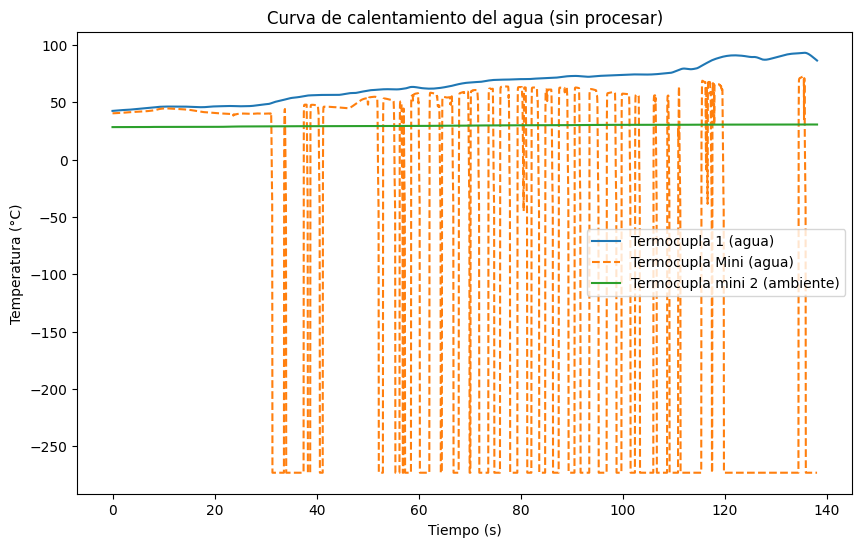

In [ ]:
# Curva de calentamiento del agua

# Aquí lo que es la termocupla mini empezó a tirar datos erróneos a pesar de haber estado en contacto con el agua, se revisó las conexiones y todo estaba en orden
# posiblemente puede ser que en algun momento se haya llegado a hacer contacto con el vaso que tenía el agua hirviendo y causó que empezara a fallar

print("La Termocupla Mini tuvo una avería la cual no se pudo arreglar, por esa razón existen datos de temperatura menores a 35 ºC a pesar de que la temperatura real era mayor.\n")
df10.head()

plt.figure(figsize=(10, 6))
plt.plot(df10['Tiempo_s'], df10['Temperatura1_gradosC_TERMOCUPLA'], label='Termocupla 1 (agua)')
plt.plot(df10['Tiempo_s'], df10['Temperatura_2_gradosC_TERMOCUPLA_MINI'], label='Termocupla Mini (agua)', linestyle='dashed')
plt.plot(df10['Tiempo_s'], df10['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'], label='Termocupla mini 2 (ambiente)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Curva de calentamiento del agua (sin procesar)')
plt.legend()
plt.show()


Se realizó una limpieza de los datos erróneos ya que igualmente se necesitan trabajar con los datos que fueron medidos adecuadamente.



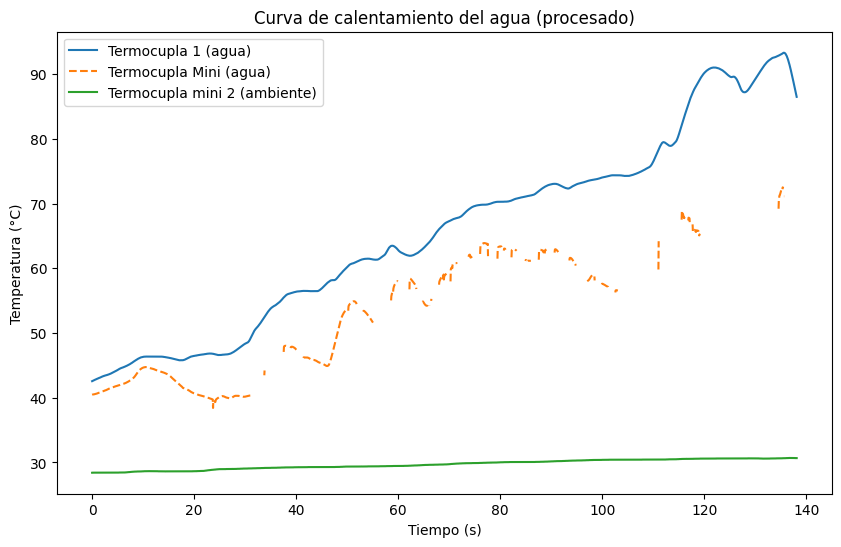

In [ ]:
# Curva de calentamiento del agua
# Pensando sobre le hecho de que igualmente se tienen que trabajar con todos los datos, se decidió limpiar aquellos datos erróneos, donde desde el segundo dato,
# si el valor absoluto de la diferencia de este con el anterior superaba a 5.00 de manera drástica o inusual, era eliminado.

print("Se realizó una limpieza de los datos erróneos ya que igualmente se necesitan trabajar con los datos que fueron medidos adecuadamente.\n")
df11.head()

plt.figure(figsize=(10, 6))
plt.plot(df11['Tiempo_s'], df11['Temperatura1_gradosC_TERMOCUPLA'], label='Termocupla 1 (agua)')
plt.plot(df11['Tiempo_s'], df11['Temperatura_2_gradosC_TERMOCUPLA_MINI'], label='Termocupla Mini (agua)', linestyle='dashed')
plt.plot(df11['Tiempo_s'], df11['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'], label='Termocupla mini 2 (ambiente)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Curva de calentamiento del agua (procesado)')
plt.legend()
plt.show()


Interpolación de los datos de Termocupla Mini para permitir y facilitar el análisis de los mismos.



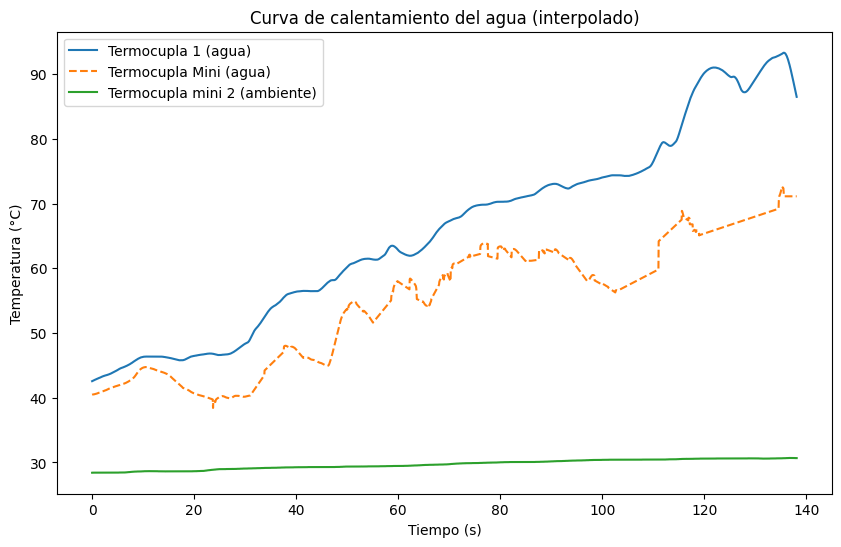

In [ ]:
# Curva de calentamiento del agua
# Pensando en cómo mejorar la visualización del trazado de los datos para poder darles utilidad a la hora de analizarlos, se usó la interpolación lineal entre los puntos ausentes
# de la gráfica.

# Esto se debe a que la interpolación es una técnica matemática que se utiliza para estimar valores desconocidos que se encuentran entre dos o más valores conocidos.
# se trata de un método para construir nuevos datos dentro del rango de un conjunto discreto de puntos de datos conocidos. Permite estimar valores en puntos donde no se tiene
# mediciones directas y ayuda a suavizar datos experimentales o mediciones ruidosas, proporcionando una trayectoria continua que puede ser más fácil de analizar y visualizar.

# Por estas razones se utilizó dicha técnica, ya que los puntos restantes de la gráfica dan información suficiente sobre la tendencia de los datos, el poder relacionarlos con las
# mediciones de temperatura del momento, mostrando un aumento de temperatura, poseyendo una pendiente positiva.

print("Interpolación de los datos de Termocupla Mini para permitir y facilitar el análisis de los mismos.\n")
df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'] = df11['Temperatura_2_gradosC_TERMOCUPLA_MINI'].interpolate()

plt.figure(figsize=(10, 6))
plt.plot(df11['Tiempo_s'], df11['Temperatura1_gradosC_TERMOCUPLA'], label='Termocupla 1 (agua)')
plt.plot(df11['Tiempo_s'], df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'], label='Termocupla Mini (agua)', linestyle='dashed')
plt.plot(df11['Tiempo_s'], df11['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'], label='Termocupla mini 2 (ambiente)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Curva de calentamiento del agua (interpolado)')
plt.legend()
plt.show()

Punto de mayor tasa de crecimiento (Termocupla 1): (t = 115.95 s, T = 93.33 ºC) con pendiente 2.7
Punto de mayor tasa de crecimiento (Termocupla Mini): (t = 111.05 s, T = 72.52 ºC) con pendiente 44.07
Punto de mayor tasa de crecimiento (Termocupla Mini 2): (t = 7.55 s, T = 30.7 ºC) con pendiente 0.2



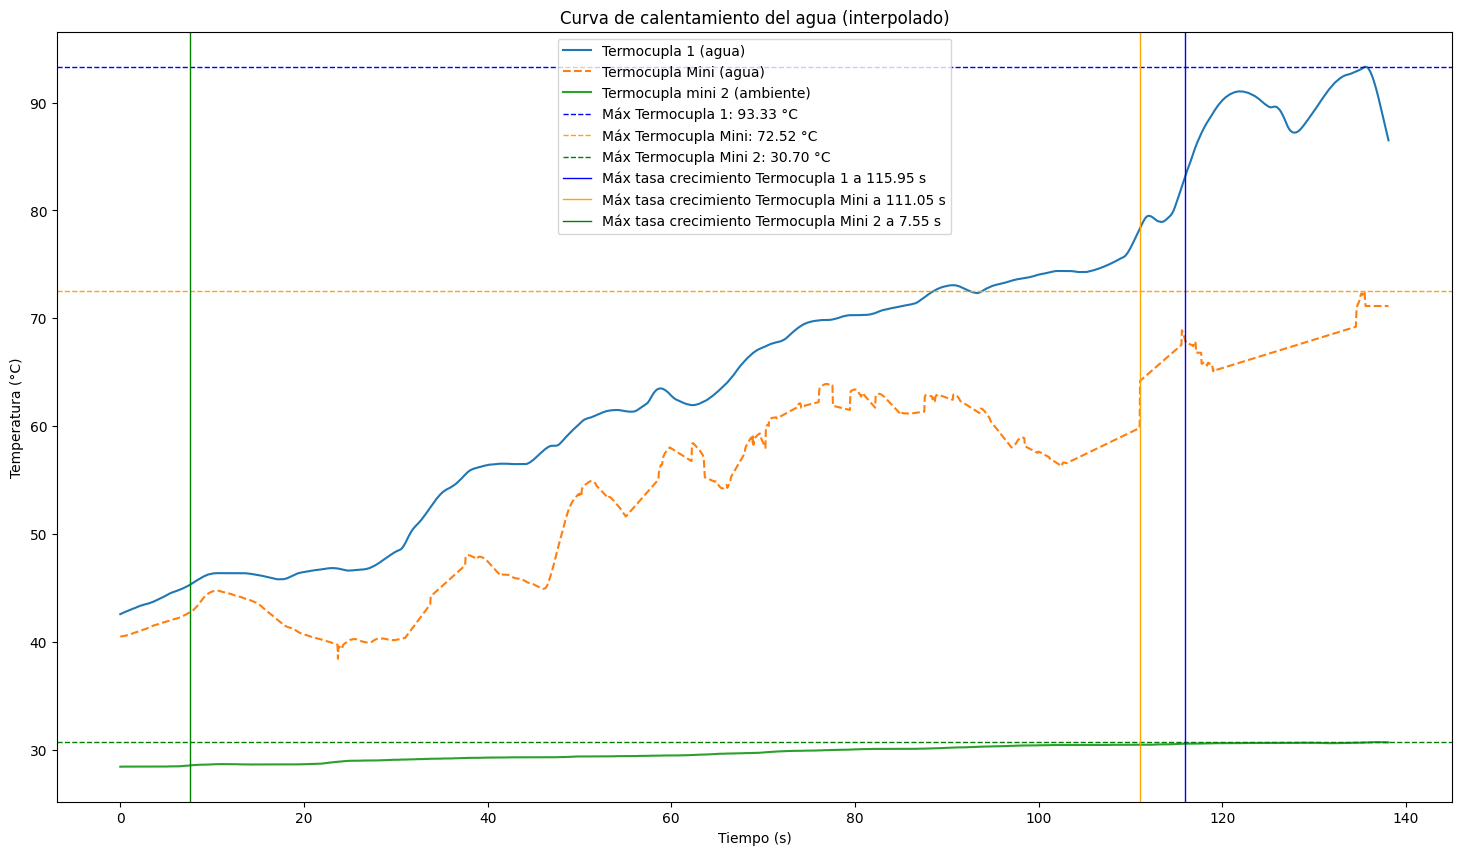

In [ ]:
# Valor máximo y mayor punto de tasa de cambio en cada gráfica para la curva de calentamiento del agua

# Interpolar datos
df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'] = df11['Temperatura_2_gradosC_TERMOCUPLA_MINI'].interpolate()

# Calcular la derivada numérica (diferencia finita) de las temperaturas respecto al tiempo
df11['dT1_dt'] = np.gradient(df11['Temperatura1_gradosC_TERMOCUPLA'], df11['Tiempo_s'])
df11['dT2_dt'] = np.gradient(df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'], df11['Tiempo_s'])
df11['dT3_dt'] = np.gradient(df11['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'], df11['Tiempo_s'])

# Encontrar el índice de la máxima tasa de crecimiento para cada columna de temperatura
max_rate_idx1 = df11['dT1_dt'].idxmax()
max_rate_idx2 = df11['dT2_dt'].idxmax()
max_rate_idx3 = df11['dT3_dt'].idxmax()

# Obtener el tiempo y las temperaturas en el punto de mayor tasa de crecimiento
max_time1 = df11['Tiempo_s'][max_rate_idx1]
max_temp1 = df11['Temperatura1_gradosC_TERMOCUPLA'][max_rate_idx1]
max_slope1 = df11['dT1_dt'][max_rate_idx1]

max_time2 = df11['Tiempo_s'][max_rate_idx2]
max_temp2 = df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'][max_rate_idx2]
max_slope2 = df11['dT2_dt'][max_rate_idx2]

max_time3 = df11['Tiempo_s'][max_rate_idx3]
max_temp3 = df11['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'][max_rate_idx3]
max_slope3 = df11['dT3_dt'][max_rate_idx3]

plt.figure(figsize=(18, 10))
plt.plot(df11['Tiempo_s'], df11['Temperatura1_gradosC_TERMOCUPLA'], label='Termocupla 1 (agua)')
plt.plot(df11['Tiempo_s'], df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'], label='Termocupla Mini (agua)', linestyle='dashed')
plt.plot(df11['Tiempo_s'], df11['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'], label='Termocupla mini 2 (ambiente)')

# Añadir líneas horizontales en los máximos
max_temp1 = df11['Temperatura1_gradosC_TERMOCUPLA'].max()
max_temp2 = df11['Temperatura_2_gradosC_TERMOCUPLA_MINI_Interpolado'].max()
max_temp3 = df11['Temperatura_3_gradosC_TERMOCUPLA_MINI_2_AMB'].max()

plt.axhline(max_temp1, color='blue', linestyle='--', linewidth=1, label=f'Máx Termocupla 1: {max_temp1:.2f} °C')
plt.axhline(max_temp2, color='orange', linestyle='--', linewidth=1, label=f'Máx Termocupla Mini: {max_temp2:.2f} °C')
plt.axhline(max_temp3, color='green', linestyle='--', linewidth=1, label=f'Máx Termocupla Mini 2: {max_temp3:.2f} °C')

# Añadir línea vertical en el punto de mayor tasa de crecimiento para cada termocupla
plt.axvline(max_time1, color='blue', linestyle='-', linewidth=1, label=f'Máx tasa crecimiento Termocupla 1 a {max_time1:.2f} s')
plt.axvline(max_time2, color='orange', linestyle='-', linewidth=1, label=f'Máx tasa crecimiento Termocupla Mini a {max_time2:.2f} s')
plt.axvline(max_time3, color='green', linestyle='-', linewidth=1, label=f'Máx tasa crecimiento Termocupla Mini 2 a {max_time3:.2f} s')

# Imprimir los resultados
print(f'Punto de mayor tasa de crecimiento (Termocupla 1): (t = {max_time1} s, T = {max_temp1} ºC) con pendiente {round(max_slope1,2)}')
print(f'Punto de mayor tasa de crecimiento (Termocupla Mini): (t = {max_time2} s, T = {max_temp2} ºC) con pendiente {round(max_slope2,2)}')
print(f'Punto de mayor tasa de crecimiento (Termocupla Mini 2): (t = {max_time3} s, T = {max_temp3} ºC) con pendiente {round(max_slope3,2)}')
print()

# Mostrar gráfica
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Curva de calentamiento del agua (interpolado)')
plt.legend()
plt.show()